In [1]:
library(knitr)
.cran_packages <- c("ggplot2", "emmeans", "ggpubr", 'dplyr')
.inst <- .cran_packages %in% installed.packages()
if(any(!.inst)) {
	install.packages(.cran_packages[!.inst])
}
sapply(.cran_packages, require, character.only = TRUE)

Loading required package: ggplot2

Loading required package: emmeans

Loading required package: ggpubr

Loading required package: magrittr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ggplot2 emmeans  ggpubr   dplyr 
   TRUE    TRUE    TRUE    TRUE

In [61]:
getwd()

[1] "/Users/yangzhang/Box/ppar/src_figures/weight and fat/figure1"

In [59]:
load("figure1.rda")
mycolor2 <- c("#8AB5F9", "#F8CB89", "#F08581", "#87A57E", "#797979")
lines <- c("solid", "solid", "solid", "solid", "dashed")
shapes <- c(24, 4, 15, 25, 1)

### for boxplot
pars <- function(x){
	r <- quantile(x, probs = c(0.10, 0.25, 0.5, 0.75, 0.90))
	names(r) <- c("ymin", "lower", "middle", "upper", "ymax")
	r
}
outliers <- function(x){
	subset(x, x < quantile(x, probs = 0.1) | quantile(x, probs = 0.9) < x)
}

theme_legend_free = function(){
	theme(axis.title.y = element_text(size = 15, 
	margin = margin(t=0, r=5, b=0, l=10)),
	axis.text.y = element_text(size = 13),
	axis.text.x = element_blank(),
	axis.ticks.x = element_blank(),
	legend.position = "none",
	plot.margin = unit(c(0.5,0.5,0,0.5), "cm"),
	panel.grid = element_blank(),
	panel.grid.major = element_blank(),
	panel.grid.minor = element_blank())
}

theme_legend = function(){
	theme(axis.title.y = element_text(size = 15, 
	margin = margin(t=0, r=5, b=0, l=10)),
	axis.text.y = element_text(size = 13),
	axis.text.x = element_blank(),
	axis.ticks.x = element_blank(),
	legend.title = element_text(colour = "white"),
	legend.text = element_text(size = 16),
	legend.position = "none",
	plot.margin = unit(c(1,0.5,0,0.5), "cm"),
	panel.grid = element_blank())
}

In [3]:
total_gained

ID,Treatment,Weight,Weight_gain_percent,Food_Intake_weekly,Calories_weekly,Date,Week,vars
<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<fct>,<fct>
1,LFD,38.4,42.22,21.9,77.66,2019-05-28,16,LFD
2,LFD,33.1,18.21,22.1,78.37,2019-05-28,16,LFD
3,LFD,35.7,54.55,20.6,73.05,2019-05-28,16,LFD
4,LFD,43.0,66.02,33.6,119.14,2019-05-28,16,LFD
5,LFD,32.2,25.29,24.5,86.88,2019-05-28,16,LFD
6,LFD,39.5,50.19,29.9,106.02,2019-05-28,16,LFD
7,LFD,34.3,33.98,23.3,82.62,2019-05-28,16,LFD
8,LFD,43.3,66.54,34.9,123.75,2019-05-28,16,LFD
9,LFD,40.5,54.58,33.5,118.79,2019-05-28,16,LFD


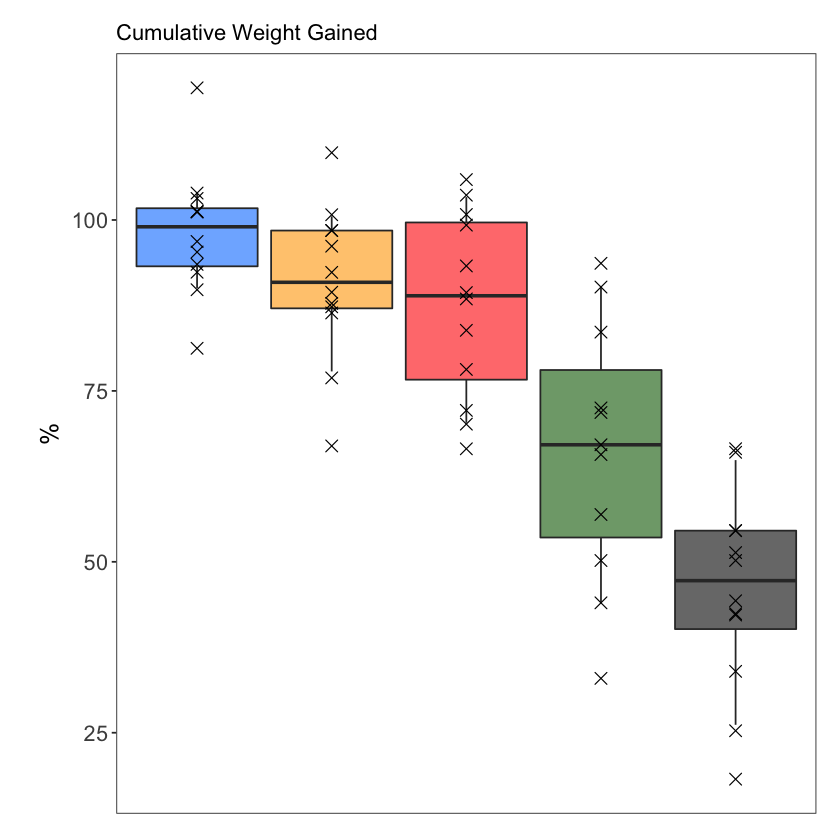

In [32]:
ggplot(data = total_gained, aes(x = vars, y = Weight_gain_percent, fill = vars), outlier.shape=NA) +
    #stat_boxplot(geom = 'errorbar', width = 0.2) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge") +
	#stat_summary(fun = outliers, geom = "point") +
    #stat_summary(fun.data = "mean_cl_normal", geom = "errorbar", size = 2) +
	scale_fill_manual(values = alpha(mycolor2, .6)) +
    geom_point(size = 3, shape = 4) +
	xlab(" ") + ylab("%") +
	ggtitle("Cumulative Weight Gained") +
	theme_bw() +
	theme_legend_free()

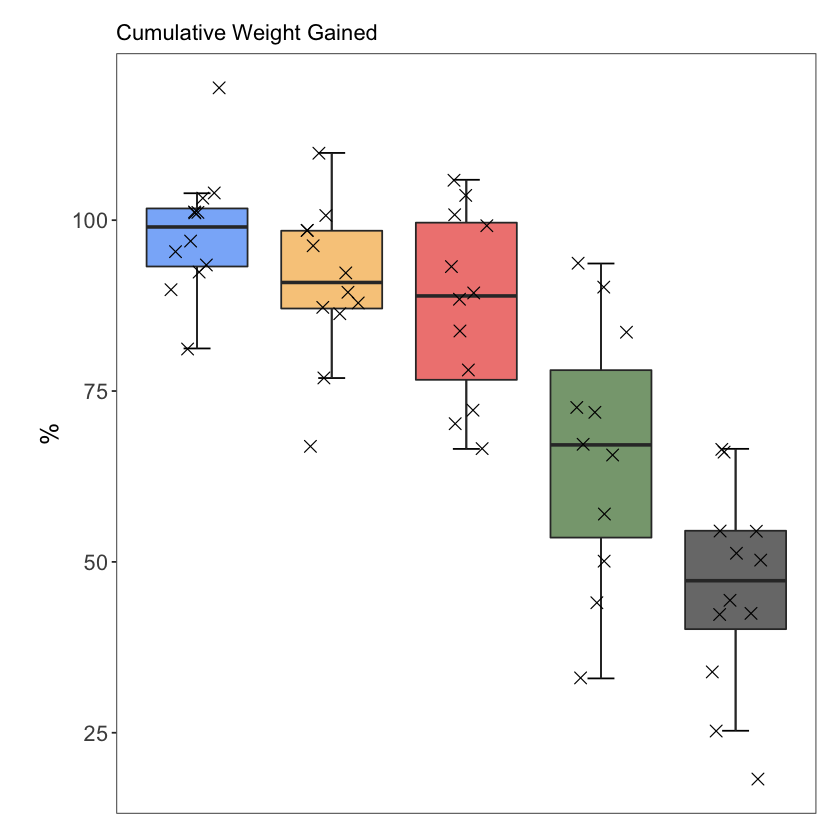

In [60]:
ggplot(data = total_gained, aes(x = vars, y = Weight_gain_percent, fill = vars)) +
    stat_boxplot(geom = 'errorbar', linetype = 1, width = 0.2) +
    geom_boxplot(outlier.shape = NA) +
	scale_fill_manual(values = mycolor2) +
    geom_jitter(shape = 4, size = 3, width = 0.2, height = 0.1) +
	xlab(" ") + ylab("%") +
	ggtitle("Cumulative Weight Gained") +
	theme_bw() +
	theme_legend_free()

https://www.r-graph-gallery.com/264-control-ggplot2-boxplot-colors.html

https://stackoverflow.com/questions/41389351/reduce-padding-in-ggplot2-legend

In [95]:
feeding <- read.csv("/Users/yangzhang/Box/MAN/pub/data/phenome_feeding.csv", as.is = TRUE)

In [96]:
feeding <- feeding %>%
	dplyr::mutate(vars = factor(Treatment,
								levels = c("HFD", "HFD+LXN", "HFD+HXN",
										   "HFD+TXN", "LFD")))
#feeding$Date <- as.Date(feeding$Date)

tail(feeding)
feeding$Date[1003]

,ID,Treatment,Weight,Weight_gain_percent,Food_Intake_weekly,Calories_weekly,Date,Week,vars
,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>
998,55,HFD+TXN,39.6,65.69,19.2,98.34,5/28/19,16,HFD+TXN
999,56,HFD+TXN,39.6,44.00,22.0,112.68,5/28/19,16,HFD+TXN
1000,57,HFD+TXN,51.9,93.66,27.5,140.85,5/28/19,16,HFD+TXN
1001,58,HFD+TXN,43.3,72.51,21.8,111.66,5/28/19,16,HFD+TXN
1002,59,HFD+TXN,34.7,32.95,29.5,151.10,5/28/19,16,HFD+TXN
1003,60,HFD+TXN,39.2,50.19,27.9,142.90,5/28/19,16,HFD+TXN


[1] "5/28/19"

In [82]:
weight_int <- filter(feeding, feeding$Date == "2020-02-04")
total_gained <- filter(feeding, feeding$Date == "2019-05-28")

Don't know how to automatically pick scale for object of type function. Defaulting to continuous.

ERROR while rich displaying an object: Error: Aesthetics must be valid data columns. Problematic aesthetic(s): x = vars, fill = vars. 
Did you mistype the name of a data column or forget to add stat()?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mi

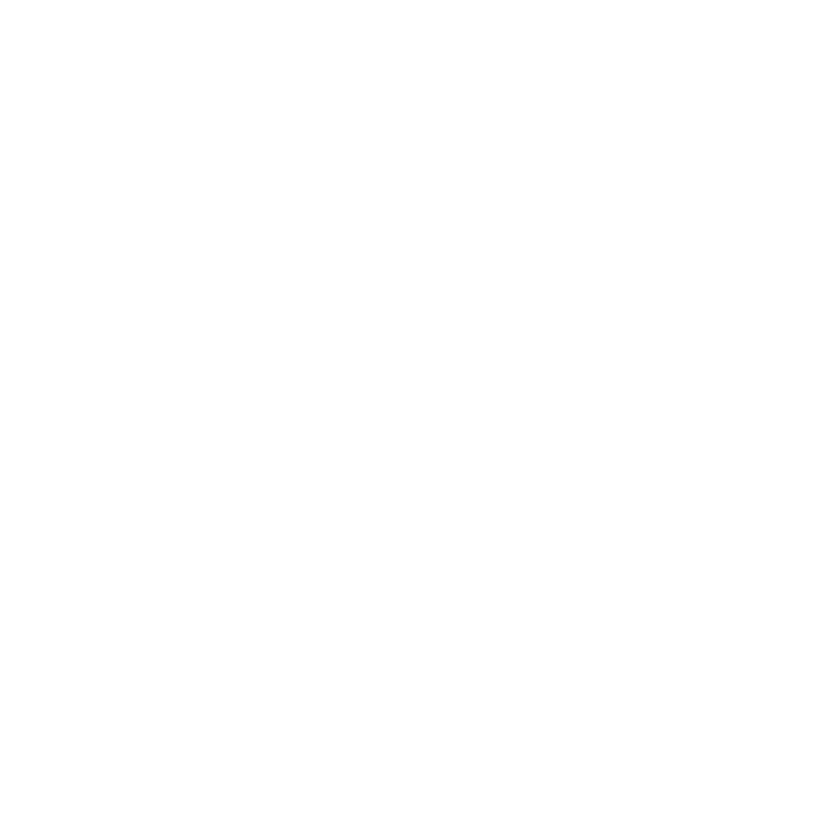

In [117]:
library(readr)
feeding <- read.csv("/Users/yangzhang/Box/MAN/pub/data/phenome_feeding.csv")
feeding$Treatment <- as.factor(feeding$Treatment)
feeding$Week <- as.factor(feeding$Week)
feeding$ID <- ordered(feeding$ID)
feeding$ID <- as.factor(feeding$ID)
feeding$Date <- as.Date(feeding$Date, "%m/%d/%y")
feeding <- feeding %>%
	dplyr::mutate(vars = factor(Treatment,
								levels = c("HFD", "HFD+LXN", "HFD+HXN",
										   "HFD+TXN", "LFD")))
tail(feeding)

,ID,Treatment,Weight,Weight_gain_percent,Food_Intake_weekly,Calories_weekly,Date,Week,vars
,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<fct>,<fct>
998,55,HFD+TXN,39.6,65.69,19.2,98.34,2019-05-28,16,HFD+TXN
999,56,HFD+TXN,39.6,44.00,22.0,112.68,2019-05-28,16,HFD+TXN
1000,57,HFD+TXN,51.9,93.66,27.5,140.85,2019-05-28,16,HFD+TXN
1001,58,HFD+TXN,43.3,72.51,21.8,111.66,2019-05-28,16,HFD+TXN
1002,59,HFD+TXN,34.7,32.95,29.5,151.10,2019-05-28,16,HFD+TXN
1003,60,HFD+TXN,39.2,50.19,27.9,142.90,2019-05-28,16,HFD+TXN


In [118]:
total_gained <- filter(feeding, Date == "2019-05-28")
head(total_gained)

,ID,Treatment,Weight,Weight_gain_percent,Food_Intake_weekly,Calories_weekly,Date,Week,vars
,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<fct>,<fct>
1,1,LFD,38.4,42.22,21.9,77.66,2019-05-28,16,LFD
2,2,LFD,33.1,18.21,22.1,78.37,2019-05-28,16,LFD
3,3,LFD,35.7,54.55,20.6,73.05,2019-05-28,16,LFD
4,4,LFD,43.0,66.02,33.6,119.14,2019-05-28,16,LFD
5,5,LFD,32.2,25.29,24.5,86.88,2019-05-28,16,LFD
6,6,LFD,39.5,50.19,29.9,106.02,2019-05-28,16,LFD


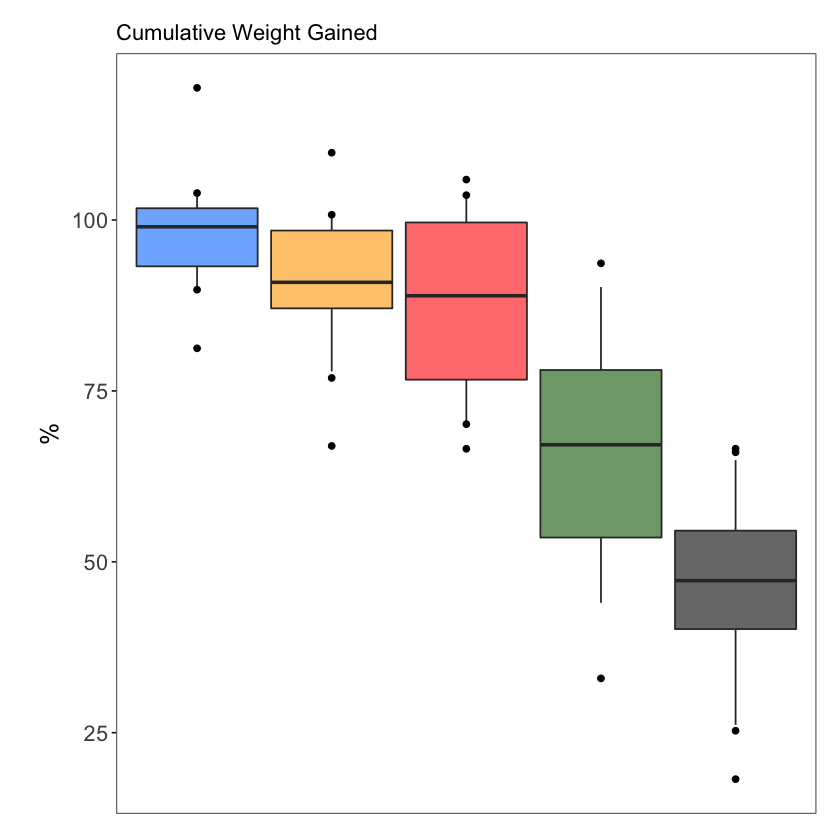

In [119]:
ggplot(data = total_gained, aes(x = vars, y = Weight_gain_percent, fill = vars)) +
	stat_summary(fun.data = pars, geom = "boxplot", position = "dodge") +
	stat_summary(fun.y = outliers, geom = "point") +
	scale_fill_manual(values = alpha(mycolor2, .6)) +
	xlab(" ") + ylab("%") +
	ggtitle("Cumulative Weight Gained") +
	theme_bw() +
	theme_legend_free()